# Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана:
    «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
    Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»:
    кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 7)})
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_calls = pd.read_csv('calls.csv')
df_internet = pd.read_csv('internet.csv')
df_messages = pd.read_csv('messages.csv')
df_tariffs = pd.read_csv('tariffs.csv')
df_users = pd.read_csv('users.csv')

# Предобработка данных

In [3]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [5]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y.%m.%d')
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls['duration'] = df_calls['duration'].astype('int64')
df_calls['month'] = df_calls['call_date'].dt.month

In [6]:
df_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [7]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.0+ MB


In [8]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [9]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [10]:
df_internet = df_internet.drop(['Unnamed: 0'], axis=1)

In [11]:
df_internet['mb_used'] = np.ceil(df_internet['mb_used'])
df_internet['mb_used'] = df_internet['mb_used'].astype('int64')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y.%m.%d')
df_internet['month'] = df_internet['session_date'].dt.month

In [12]:
df_internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9


In [13]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  int64         
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
 4   month         149396 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.1+ MB


In [14]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [15]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [16]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y.%m.%d')
df_messages['month'] = df_messages['message_date'].dt.month

In [17]:
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [18]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [19]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [20]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 19.6+ KB


In [21]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y.%m.%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y.%m.%d')
df_users['reg_month'] = df_users['reg_date'].dt.month

In [22]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


In [23]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
 8   reg_month   500 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 27.4+ KB


In [24]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [25]:
calls_pivot = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum')
messages_pivot = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
internet_pivot = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')

In [26]:
calls_pivot

duration
user_id month          
1000    5           159
        6           172
        7           340
        8           408
        9           466
...                 ...
1498    10          247
1499    9            70
        10          449
        11          612
        12          492

[3174 rows x 1 columns]

In [27]:
messages_pivot

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

In [28]:
internet_pivot

mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581
...                ...
1498    10       20604
1499    9         1848
        10       17809
        11       17984
        12       13077

[3203 rows x 1 columns]

In [29]:
df = calls_pivot.merge(messages_pivot, on=['user_id', 'month'], how='left')
df = df.merge(internet_pivot, on=['user_id', 'month'], how='left')
df = df.reset_index(level=1)
df = df.merge(df_users[['tariff', 'user_id', 'city']], on='user_id', how='left')
df.columns = ['user_id', 'month', 'calls_duration', 'messages_count', 'mb_used', 'tariff', 'city']
df = df.fillna(0)
df['messages_count'] = df['messages_count'].astype('int64')
df['mb_used'] = df['mb_used'].astype('int64')
df

,user_id,month,calls_duration,messages_count,mb_used,tariff,city
0,1000,5,159,22,2256,ultra,Краснодар
1,1000,6,172,60,23257,ultra,Краснодар
2,1000,7,340,75,14016,ultra,Краснодар
3,1000,8,408,81,14070,ultra,Краснодар
4,1000,9,466,57,14581,ultra,Краснодар
...,...,...,...,...,...,...,...
3169,1498,10,247,42,20604,smart,Владикавказ
3170,1499,9,70,11,1848,smart,Пермь
3171,1499,10,449,48,17809,smart,Пермь
3172,1499,11,612,59,17984,smart,Пермь


In [30]:
df_smart = df.query('tariff == "smart"')
df_ultra = df.query('tariff == "ultra"')

In [31]:
df_smart

,user_id,month,calls_duration,messages_count,mb_used,tariff,city
8,1001,11,430,0,18452,smart,Москва
9,1001,12,414,0,14053,smart,Москва
10,1002,6,117,4,10871,smart,Стерлитамак
11,1002,7,214,11,17601,smart,Стерлитамак
12,1002,8,289,13,20347,smart,Стерлитамак
...,...,...,...,...,...,...,...
3169,1498,10,247,42,20604,smart,Владикавказ
3170,1499,9,70,11,1848,smart,Пермь
3171,1499,10,449,48,17809,smart,Пермь
3172,1499,11,612,59,17984,smart,Пермь


In [32]:
df_ultra

,user_id,month,calls_duration,messages_count,mb_used,tariff,city
0,1000,5,159,22,2256,ultra,Краснодар
1,1000,6,172,60,23257,ultra,Краснодар
2,1000,7,340,75,14016,ultra,Краснодар
3,1000,8,408,81,14070,ultra,Краснодар
4,1000,9,466,57,14581,ultra,Краснодар
...,...,...,...,...,...,...,...
3146,1495,8,92,13,2616,ultra,Иркутск
3147,1495,9,813,82,33105,ultra,Иркутск
3148,1495,10,1030,82,29393,ultra,Иркутск
3149,1495,11,954,79,38972,ultra,Иркутск


In [33]:
messages_included_smart = 50
messages_included_ultra = 100
mb_per_month_included_smart = 15360
mb_per_month_included_ultra = 30720
minutes_included_smart = 500
minutes_included_ultra = 3000
rub_monthly_fee_smart = 550
rub_monthly_fee_ultra = 1950
rub_per_gb_smart = 0.195
rub_per_gb_ultra = 0.146
rub_per_message_smart = 3
rub_per_message_ultra = 1
rub_per_minute_smart = 3
rub_per_minute_ultra = 1

In [34]:
def add_revenue_smart(row):
    
    calls_duration = row['calls_duration']
    messages_count = row['messages_count']
    mb_used = row['mb_used']
    
    total_calls = 0
    total_messages = 0
    total_mb = 0
    
    if calls_duration > minutes_included_smart:
        total_calls = (calls_duration - minutes_included_smart) * rub_per_minute_smart
        
    if calls_duration < minutes_included_smart:
        total_calls = 0
        
    if messages_count > messages_included_smart:
        total_messages = (messages_count - messages_included_smart) * rub_per_message_smart
        
    if messages_count < messages_included_smart:
        total_messages = 0
        
    if mb_used > mb_per_month_included_smart:
        total_mb = (mb_used - mb_per_month_included_smart) * rub_per_gb_smart
        
    if mb_used < mb_per_month_included_smart:
        total_mb = 0
            
    return (total_calls + total_messages + total_mb)  + rub_monthly_fee_smart


df_smart['profit'] = df.apply(add_revenue_smart, axis=1)

In [35]:
df_smart

,user_id,month,calls_duration,messages_count,mb_used,tariff,city,profit
8,1001,11,430,0,18452,smart,Москва,1152.940
9,1001,12,414,0,14053,smart,Москва,550.000
10,1002,6,117,4,10871,smart,Стерлитамак,550.000
11,1002,7,214,11,17601,smart,Стерлитамак,986.995
12,1002,8,289,13,20347,smart,Стерлитамак,1522.465
...,...,...,...,...,...,...,...,...
3169,1498,10,247,42,20604,smart,Владикавказ,1572.580
3170,1499,9,70,11,1848,smart,Пермь,550.000
3171,1499,10,449,48,17809,smart,Пермь,1027.555
3172,1499,11,612,59,17984,smart,Пермь,1424.680


In [36]:
def add_revenue_ultra(row):
    
    calls_duration = row['calls_duration']
    messages_count = row['messages_count']
    mb_used = row['mb_used']
    
    total_calls = 0
    total_messages = 0
    total_mb = 0
    
    if calls_duration > minutes_included_ultra:
        total_calls = (calls_duration - minutes_included_ultra) * rub_per_minute_ultra
        
    if calls_duration < minutes_included_ultra:
        total_calls = 0
        
    if messages_count > messages_included_ultra:
        total_messages = (messages_count - messages_included_ultra) * rub_per_message_ultra
        
    if messages_count < messages_included_ultra:
        total_messages = 0
        
    if mb_used > mb_per_month_included_ultra:
        total_mb = (mb_used - mb_per_month_included_ultra) * rub_per_gb_ultra
        
    if mb_used < mb_per_month_included_ultra:
        total_mb = 0
            
    return (total_calls + total_messages + total_mb)  + rub_monthly_fee_ultra


df_ultra['profit'] = df.apply(add_revenue_ultra, axis=1)

In [37]:
df_ultra

,user_id,month,calls_duration,messages_count,mb_used,tariff,city,profit
0,1000,5,159,22,2256,ultra,Краснодар,1950.000
1,1000,6,172,60,23257,ultra,Краснодар,1950.000
2,1000,7,340,75,14016,ultra,Краснодар,1950.000
3,1000,8,408,81,14070,ultra,Краснодар,1950.000
4,1000,9,466,57,14581,ultra,Краснодар,1950.000
...,...,...,...,...,...,...,...,...
3146,1495,8,92,13,2616,ultra,Иркутск,1950.000
3147,1495,9,813,82,33105,ultra,Иркутск,2298.210
3148,1495,10,1030,82,29393,ultra,Иркутск,1950.000
3149,1495,11,954,79,38972,ultra,Иркутск,3154.792


In [38]:
df2 = df_smart.append(df_ultra)
df2 = df2.reset_index(drop=True)
df2['profit'] = np.ceil(df2['profit'])
df2['profit'] = df2['profit'].astype('int64')
df2

,user_id,month,calls_duration,messages_count,mb_used,tariff,city,profit
0,1001,11,430,0,18452,smart,Москва,1153
1,1001,12,414,0,14053,smart,Москва,550
2,1002,6,117,4,10871,smart,Стерлитамак,550
3,1002,7,214,11,17601,smart,Стерлитамак,987
4,1002,8,289,13,20347,smart,Стерлитамак,1523
...,...,...,...,...,...,...,...,...
3169,1495,8,92,13,2616,ultra,Иркутск,1950
3170,1495,9,813,82,33105,ultra,Иркутск,2299
3171,1495,10,1030,82,29393,ultra,Иркутск,1950
3172,1495,11,954,79,38972,ultra,Иркутск,3155


# Поведение пользователя

In [39]:
df2_calls_mean = (df2
            .query('calls_duration > 0')
            .pivot_table(index=['tariff'], values='calls_duration', aggfunc=['mean', 'median', np.var, np.std])
)
df2_calls_mean.columns = ['mean', 'median', 'var', 'std']

In [40]:
df2_messages_mean = (df2
            .query('messages_count > 0')
            .pivot_table(index=['tariff'], values='messages_count', aggfunc=['mean', 'median', np.var, np.std])
)
df2_messages_mean.columns = ['mean', 'median', 'var', 'std']

In [41]:
df2_mb_used_mean = (df2
            .query('mb_used > 0')
            .pivot_table(index=['tariff'], values='mb_used', aggfunc=['mean', 'median', np.var, np.std])
)
df2_mb_used_mean.columns = ['mean', 'median', 'var', 'std']

In [42]:
df2_calls_mean

,mean,median,var,std
tariff,,,,
smart,419.440342,423,35718.128534,188.992403
ultra,547.755016,529,93338.428291,305.513385


In [43]:
df2_messages_mean

,mean,median,var,std
tariff,,,,
smart,38.747390,34,719.172709,26.817396
ultra,61.195538,52,1999.574067,44.716597


In [44]:
df2_mb_used_mean

,mean,median,var,std
tariff,,,,
smart,16244.782080,16531.0,3.440762e+07,5865.800623
ultra,19708.508511,19451.5,9.944383e+07,9972.152826


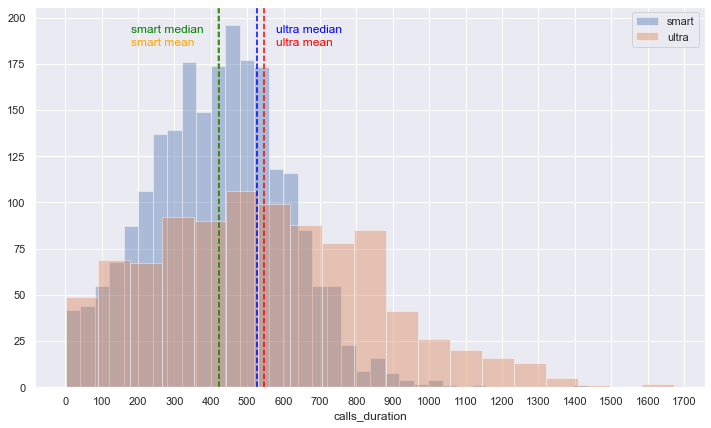

In [54]:
plt.axvline(df2.query('tariff == "smart"')['calls_duration'].mean(), linestyle='--', color='orange');
plt.text(x=180, y=185, s='smart mean', fontsize=12, color='orange');
plt.axvline(df2.query('tariff == "smart"')['calls_duration'].median(), linestyle='--', color='green');
plt.text(x=180, y=192, s='smart median', fontsize=12, color='green');
plt.axvline(df2.query('tariff == "ultra"')['calls_duration'].mean(), linestyle='--', color='red');
plt.text(x=580, y=185, s='ultra mean', fontsize=12, color='red');
plt.axvline(df2.query('tariff == "ultra"')['calls_duration'].median(), linestyle='--', color='blue');
plt.text(x=580, y=192, s='ultra median', fontsize=12, color='blue');
ax = sns.distplot(df2.query('tariff == "smart" and calls_duration > 0')['calls_duration'], kde=False,label='smart');
ax = sns.distplot(df2.query('tariff == "ultra" and calls_duration > 0')['calls_duration'], kde=False,label='ultra');
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.legend();
plt.show()

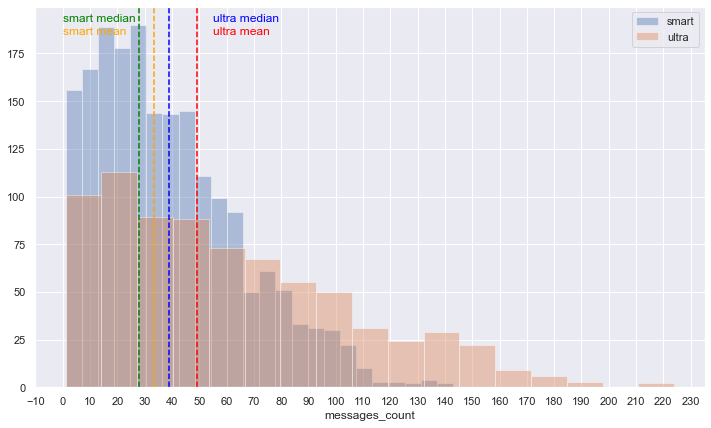

In [63]:
plt.axvline(df2.query('tariff == "smart"')['messages_count'].mean(), linestyle='--', color='orange');
plt.text(x=0, y=185, s='smart mean', fontsize=12, color='orange');
plt.axvline(df2.query('tariff == "smart"')['messages_count'].median(), linestyle='--', color='green');
plt.text(x=0, y=192, s='smart median', fontsize=12, color='green');
plt.axvline(df2.query('tariff == "ultra"')['messages_count'].mean(), linestyle='--', color='red');
plt.text(x=55, y=185, s='ultra mean', fontsize=12, color='red');
plt.axvline(df2.query('tariff == "ultra"')['messages_count'].median(), linestyle='--', color='blue');
plt.text(x=55, y=192, s='ultra median', fontsize=12, color='blue');
ax = sns.distplot(df2.query('tariff == "smart" and messages_count > 0')['messages_count'], kde=False, label='smart');
ax = sns.distplot(df2.query('tariff == "ultra" and messages_count > 0')['messages_count'], kde=False, label='ultra');
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.legend();
plt.show()

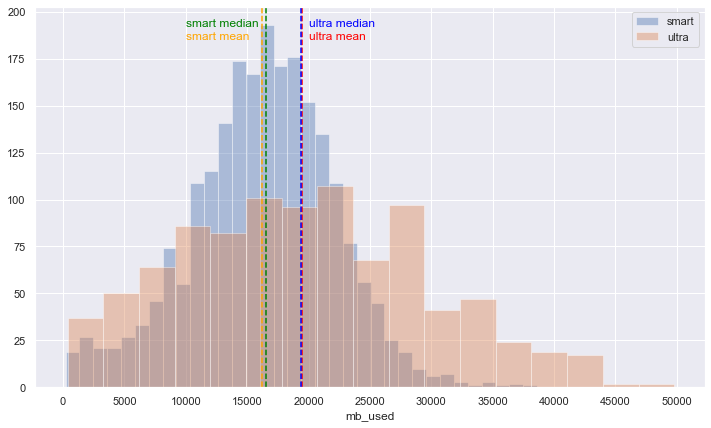

In [69]:
plt.axvline(df2.query('tariff == "smart"')['mb_used'].mean(), linestyle='--', color='orange');
plt.text(x=10000, y=185, s='smart mean', fontsize=12, color='orange');
plt.axvline(df2.query('tariff == "smart"')['mb_used'].median(), linestyle='--', color='green');
plt.text(x=10000, y=192, s='smart median', fontsize=12, color='green');
plt.axvline(df2.query('tariff == "ultra"')['mb_used'].mean(), linestyle='--', color='red');
plt.text(x=20000, y=185, s='ultra mean', fontsize=12, color='red');
plt.axvline(df2.query('tariff == "ultra"')['mb_used'].median(), linestyle='--', color='blue');
plt.text(x=20000, y=192, s='ultra median', fontsize=12, color='blue');
ax = sns.distplot(df2.query('tariff == "smart" and mb_used > 0')['mb_used'], kde=False, label='smart');
ax = sns.distplot(df2.query('tariff == "ultra" and mb_used > 0')['mb_used'], kde=False, label='ultra');
ax.xaxis.set_major_locator(ticker.MultipleLocator(5000));
ax.xaxis.set_major_formatter(ticker.ScalarFormatter());
plt.legend();
plt.show()

# Вывод

На графиках мы надблюдаем нормальное распределение величин, среднее и медиану. Сейчас графики нам говорят о том, что в среднем предложенного тарифом трафика клиенту хватает. График с сообщениями говорит о том, что среди большинства клиентов из выборки опция сообщений не пользуется большой популярностью, но всё же какая-никакая популярность есть. У нас есть ещё сводные таблицы с приведенным стандартным отклоением по выборке, которое показывает большой разброс значений вокруг среднего, что ставит правильность среднего под сомнение. Действительно, в выборке много пользователей, которые используют опции тарифа по разному. Кто-то предпочитает звонкам и сообщениям интернет трафик, кто-то наоборот. Мне кажется от сюда и разброс. Стандартное отклонение по выборке не даёт нам окончательного права утверждать, что среднее значение выборки верно, оно большое и в некоторых случаях почти равно половине среднего.

# Проверка гипотез

средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

H0 = будет означать, что прибыль обоих тарифов равна. H1 = наоборот, прибыль различается

In [ ]:
smart_profit = df2.query('tariff == "smart"')['profit']
ultra_profit = df2.query('tariff == "ultra"')['profit']
alpha = .05

results = st.ttest_ind(smart_profit, ultra_profit, equal_var = False)

print('Средняя прибыль тарифа smart', smart_profit.mean())
print('Средняя прибыль тарифа ultra', ultra_profit.mean())
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, H1")
else:
    print("Не получилось отвергнуть нулевую гипотезу, H0")

In [ ]:
smart_moscow_profit = df2.query('tariff == "smart" and city == "Москва"')['profit']
smart_other_city_profit = df2.query('tariff == "smart" and city != "Москва"')['profit']
alpha = .05

results = st.ttest_ind(smart_moscow_profit, smart_other_city_profit)

print('Средняя прибыль тарифа смарт в Москве', smart_moscow_profit.mean())
print('Средняя прибыль тарифа смарт в других городах', smart_other_city_profit.mean())
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, H1")
else:
    print("Не получилось отвергнуть нулевую гипотезу, H0")

In [ ]:
ultra_moscow_profit = df2.query('tariff == "ultra" and city == "Москва"')['profit']
ultra_other_city_profit = df2.query('tariff == "ultra" and city != "Москва"')['profit']
alpha = .05

results = st.ttest_ind(ultra_moscow_profit, ultra_other_city_profit)

print('Средняя прибыль тарифа ультра в Москве', ultra_moscow_profit.mean())
print('Средняя прибыль тарифа ультра в других городах', ultra_other_city_profit.mean())
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, H1")
else:
    print("Не получилось отвергнуть нулевую гипотезу, H0")

# Общий вывод

Если отвечать на вопрос "какой тариф приносит компании больше прибыли" ответом будет тариф "ultra". Это и подтвержает наш ttest. Прибыль в Москве и других городах не отличается, по крайней мере существенно, гипотезу различия отклоняем.